<a href="https://colab.research.google.com/github/daegeunbae/daegeunbae/blob/main/RFM_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Consumer Segmentation

In [1]:
#https://medium.com/web-mining-is688-spring-2021/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0
#https://zephyrus1111.tistory.com/13
#https://zephyrus1111.tistory.com/16
#https://www.youtube.com/watch?v=kVghF_NeS_Q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/02.coding/14.Builton/RFM/bae_vol1.csv',encoding='cp949')
df.head()

ITG_USER_ID  ENR_CATE_CODE LCATE_NAME  MCATE_NAME SCATE_NAME DCATE_NAME  \
0      2287103       10050208      유아,완구  분유/기저귀/물티슈        이유식      수제이유식   
1      2579520       10050224      유아,완구  분유/기저귀/물티슈        이유식      가공이유식   
2       870731       10050224      유아,완구  분유/기저귀/물티슈        이유식      가공이유식   
3       119905       10050208      유아,완구  분유/기저귀/물티슈        이유식      수제이유식   
4        76996       10050224      유아,완구  분유/기저귀/물티슈        이유식      가공이유식   

   BUY_DATE                  MODEL_NAME  MODEL_NO  MAKER_ID  ...  SI-DO  \
0  20210814          이유식 1단계 미음 160g@6개  39362074     10317  ...    경기도   
1  20210414            큐브데이 다진야채 이유식 큐브  34130448      2880  ...    경기도   
2  20210317  아이밀 우리아이 바로먹는 카레소스 160g@4개  61903490      3854  ...   경상남도   
3  20210111    클래식 이유식 아기밥 4단계 160g@12개  50653441    113167  ...  인천광역시   
4  20210907            큐브데이 다진야채 이유식 큐브  34130448      2880  ...   경상북도   

     SI-GU                                     MODEL_ATTRI  \
0      화성시     수제이유식/4개월~/미음/HACCP인증,유기농,무항생제인증/냉장/160g/6개   
1  용인시 수지구                                          반고형이유식   
2      진주시                                      반찬/160g/4개   
3      연수구  수제이유식/13개월~/아기밥/HACCP인증,유기농,무항생제인증/냉장/160g/12개   
4   포항시 북구                                          반고형이유식   

                                      ITEM_CHECK_URL     ORDER_NO  UPDATE_OX  \
0            http://www.11st.co.kr/products/10500632  2.02108E+16          0   
1  https://inflow.pay.naver.com/rd?no=510256823&t...  2.02104E+15          0   
2   https://front.wemakeprice.com/product/1155196356    199192684          0   
3  http://my.coupang.com/product/detail?vendorIte...  2.90001E+13          0   
4  https://inflow.pay.naver.com/rd?no=510256823&t...  2.02109E+15          0   

  UNIT_PRICE  UNIT_PRICE2  BUY_MONTH  BUY_WEEK  
0    15876.0      16.5375     202108    202132  
1     2008.0    2008.0000     202104    202115  
2     8490.0      13.2656     202103    202111  
3    36500.0      19.0104     202101    202102  
4     3000.0    3000.0000     202109    202136  

[5 rows x 31 columns]

In [3]:
#df = df.rename(columns={'Customer ID':'CustomerID'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80266 entries, 0 to 80265
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ITG_USER_ID     80266 non-null  int64  
 1   ENR_CATE_CODE   80266 non-null  int64  
 2   LCATE_NAME      80266 non-null  object 
 3   MCATE_NAME      80266 non-null  object 
 4   SCATE_NAME      80266 non-null  object 
 5   DCATE_NAME      80266 non-null  object 
 6   BUY_DATE        80266 non-null  int64  
 7   MODEL_NAME      80266 non-null  object 
 8   MODEL_NO        80266 non-null  int64  
 9   MAKER_ID        80266 non-null  int64  
 10  BRAND_ID        80266 non-null  int64  
 11  MAKER_NAME      80266 non-null  object 
 12  BRAND_NAME      80266 non-null  object 
 13  GENDER          80266 non-null  object 
 14  BIRTH_CODE      80266 non-null  object 
 15  SMTD_SHOP_CODE  80266 non-null  int64  
 16  SMTD_SHOP_NAME  80266 non-null  object 
 17  QNTY            80266 non-null 

## Data Cleaning

### 이유식 외 음료 상품군 제외

In [5]:
df['DCATE_NAME'].value_counts()

가공이유식    37238
수제이유식    34566
이유식재료     4962
음료        3478
이유식         22
Name: DCATE_NAME, dtype: int64

In [6]:
delete = df['DCATE_NAME'].isin(['음료'])
df = df[~delete]
df['DCATE_NAME'].value_counts()

가공이유식    37238
수제이유식    34566
이유식재료     4962
이유식         22
Name: DCATE_NAME, dtype: int64

### 최근 1년 데이터만 정제

In [7]:
df['BUY_DATE'] = df['BUY_DATE'].astype('str')
df['BUY_DATE'] = pd.to_datetime(df['BUY_DATE'],format='%Y-%m-%d')
df = df[df['BUY_DATE'].between('2021-10-01', '2022-09-30')]

In [8]:
df['BUY_DATE']

43338   2021-10-12
43339   2022-02-10
43340   2022-08-04
43341   2021-10-27
43342   2022-03-31
           ...    
80260   2022-08-08
80261   2022-03-21
80263   2022-08-29
80264   2022-01-21
80265   2021-12-13
Name: BUY_DATE, Length: 33638, dtype: datetime64[ns]

In [9]:
print('최근날짜:',max(df['BUY_DATE']))
print('1년전날짜:',min(df['BUY_DATE']))

최근날짜: 2022-09-30 00:00:00
1년전날짜: 2021-10-01 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33638 entries, 43338 to 80265
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ITG_USER_ID     33638 non-null  int64         
 1   ENR_CATE_CODE   33638 non-null  int64         
 2   LCATE_NAME      33638 non-null  object        
 3   MCATE_NAME      33638 non-null  object        
 4   SCATE_NAME      33638 non-null  object        
 5   DCATE_NAME      33638 non-null  object        
 6   BUY_DATE        33638 non-null  datetime64[ns]
 7   MODEL_NAME      33638 non-null  object        
 8   MODEL_NO        33638 non-null  int64         
 9   MAKER_ID        33638 non-null  int64         
 10  BRAND_ID        33638 non-null  int64         
 11  MAKER_NAME      33638 non-null  object        
 12  BRAND_NAME      33638 non-null  object        
 13  GENDER          33638 non-null  object        
 14  BIRTH_CODE      33638 non-null  object        
 15

### 결측치 대체 생략

In [11]:
# 해당 컬럼들 [ RECP_ZIPCD, SI-GU, ITEM_CHECK_URL, MODEL_ATTRI ] RFM 분석과 상관없으므로 삭제하지 않음
df.isnull().sum()

ITG_USER_ID          0
ENR_CATE_CODE        0
LCATE_NAME           0
MCATE_NAME           0
SCATE_NAME           0
DCATE_NAME           0
BUY_DATE             0
MODEL_NAME           0
MODEL_NO             0
MAKER_ID             0
BRAND_ID             0
MAKER_NAME           0
BRAND_NAME           0
GENDER               0
BIRTH_CODE           0
SMTD_SHOP_CODE       0
SMTD_SHOP_NAME       0
QNTY                 0
GOODS_PRICE          0
AMT                  0
RECP_ZIPCD        4532
SI-DO                0
SI-GU             1144
MODEL_ATTRI          0
ITEM_CHECK_URL       2
ORDER_NO             0
UPDATE_OX            0
UNIT_PRICE           0
UNIT_PRICE2          0
BUY_MONTH            0
BUY_WEEK             0
dtype: int64

In [12]:
#비율이 비슷하므로 앞에 있는 값 대체
#df['RECP_ZIPCD']= df['RECP_ZIPCD'].fillna(method='bfill')

In [13]:
#비율이 비슷하므로 앞에 있는 값 대체
#df['SI-GU']= df['SI-GU'].fillna(method='bfill')

In [14]:
df.shape

(33638, 31)

In [15]:
# 나머지 결측치 있는 행 삭제
#df.dropna(axis=0,how='any',inplace=True)
#df.isnull().sum()

In [16]:
df['MODEL_ATTRI']

43338         수제이유식/4개월~/미음/HACCP인증,유기농,무항생제인증/냉장/160g/6개
43339                                             반찬/1.5g
43340       수제이유식/10개월~/진밥/HACCP인증,유기농,무항생제인증/냉장/180g/12개
43341    레토르트이유식/12개월~/진밥/HACCP인증/원산지:국내산/상온/180g(90gX2입)
43342                                         반찬/1.7g/40개
                               ...                       
80260                           반찬/종류:햄/HACCP인증,무항생제인증/상온
80261                         반찬/24개월~/HACCP인증/재료:고기(국내산)
80263                                             레토르트이유식
80264                                       수제이유식/180g/1개
80265                              반찬,수제이유식/HACCP인증/냉장/1개
Name: MODEL_ATTRI, Length: 33638, dtype: object

In [17]:
df.shape

(33638, 31)

## RFM Carculation

### Monetary

In [18]:
#고객별 구매금액
df['Amount'] = df['QNTY'] * df['AMT']
monetary = df.groupby('ITG_USER_ID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.tail()

ITG_USER_ID    Amount
4462   7000027863  109560.0
4463   7000029258   26739.0
4464   7000030368   21330.0
4465   7000030455   74256.0
4466   7000031361    1750.0

mean   > 157960.7789344079
median > 42215.0


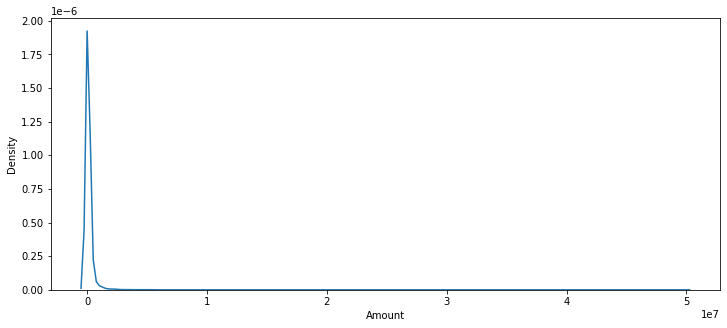

In [19]:
# monetary에 대한 분포는 극소수
plt.figure(figsize=(12, 5))
sns.kdeplot(monetary.Amount)
print('mean   >', monetary.Amount.mean())
print('median >', monetary.Amount.median())

### Frequency

In [20]:
#고객별 구매 빈도
frequency = df.groupby('ITG_USER_ID')['ORDER_NO'].count()
frequency = frequency.reset_index()
frequency.head()

ITG_USER_ID  ORDER_NO
0          469         3
1         1168        24
2         3749        11
3         4353         3
4         5315         1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


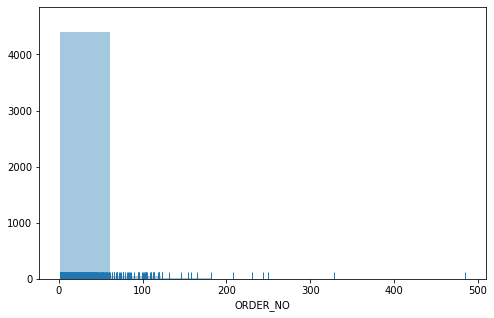

In [21]:
# 구매빈도 또한 극소수
plt.figure(figsize=(8,5))
sns.distplot(frequency.ORDER_NO,bins=8,kde=False,rug=True)

### Recency

In [22]:
#고객의 마지막 거래 날짜에서 가장 최근 날짜를 빼서 최근 날짜 계산
df['Diff'] = max(df['BUY_DATE'])-df['BUY_DATE']
recency = df.groupby('ITG_USER_ID')['Diff'].min()
#recency['Diff'] = recency['Diff'].dt.days
recency = recency.reset_index()
recency.head()

ITG_USER_ID     Diff
0          469 206 days
1         1168  24 days
2         3749  21 days
3         4353 350 days
4         5315 205 days

In [23]:
# day type으로 변경
recency['Diff'] = recency['Diff'].dt.days
recency.head()

ITG_USER_ID  Diff
0          469   206
1         1168    24
2         3749    21
3         4353   350
4         5315   205

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


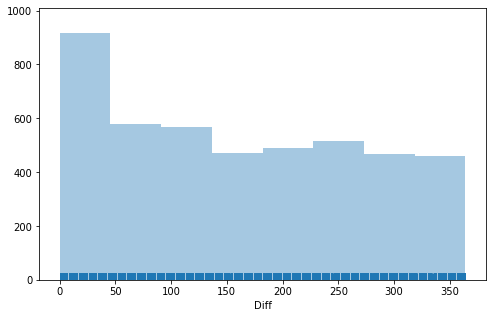

In [24]:
#고객 최신성 계산
plt.figure(figsize=(8,5))
sns.distplot(recency.Diff,bins=8,kde=False,rug=True)

### RFM 계산

In [25]:
# 고객의 모든 금액을 합산하여 금액 계산
rf = pd.merge(recency, frequency, on= 'ITG_USER_ID', how = 'inner')
rfm = pd.merge(rf, monetary, on= 'ITG_USER_ID', how = 'inner')
rfm.columns = ['ITG_USER_ID','recency','frequency','monetary']
rfm.head()

ITG_USER_ID  recency  frequency  monetary
0          469      206          3  172160.0
1         1168       24         24  444216.0
2         3749       21         11  214315.0
3         4353      350          3  175508.0
4         5315      205          1   18020.0

### Outlier treatment

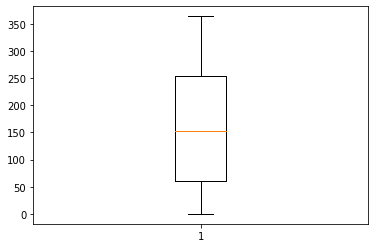

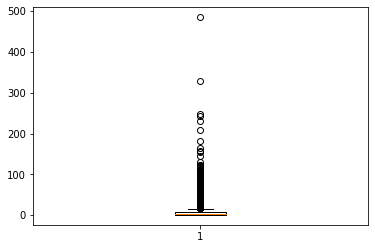

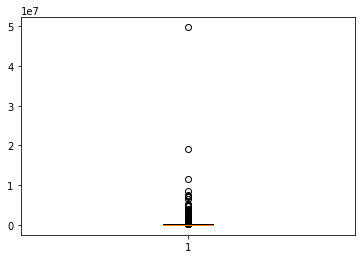

In [26]:
plt.boxplot(rfm['recency'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['monetary'])
plt.show()

In [27]:
q1_recency= rfm['frequency'].quantile(0.05)
q3_recency= rfm['frequency'].quantile(0.95)
IQR = q3_recency - q1_recency
rfm = rfm[(rfm['frequency']>=q1_recency-1.5*IQR)&(rfm['frequency']<=q3_recency+1.5*IQR)]

q1_monetary= rfm['monetary'].quantile(0.05)
q3_monetary= rfm['monetary'].quantile(0.95)
IQR = q3_monetary - q1_monetary
rfm = rfm[(rfm['monetary']>=q1_monetary-1.5*IQR)&(rfm['monetary']<=q3_monetary+1.5*IQR)]

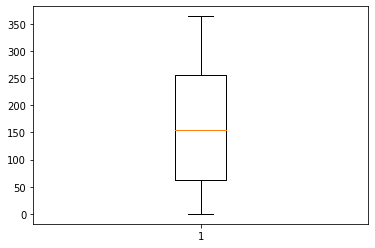

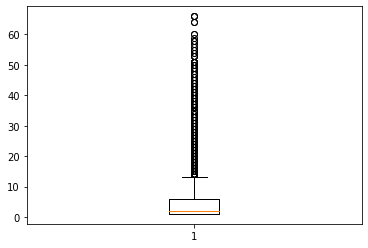

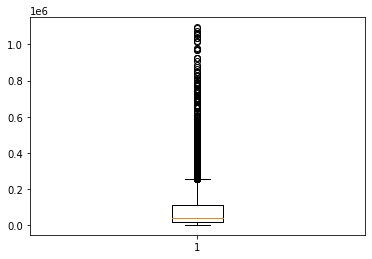

In [28]:
plt.boxplot(rfm['recency'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['monetary'])
plt.show()

## Assigning RFM Scores

In [29]:
#https://www.kaggle.com/code/ozlemilgun/customer-segmentation-using-rfm-analysis
#RFM 분석은 각 고객에 대해 이 세 가지 범주를 각각 1에서 5로 수치적으로 확장
#이것은 수치가 높을수록 더 좋은 결과
#"최고" 고객은 모든 범주에서 최고 점수를 받는 반면, 최근 점수의 경우 가장 가치 있는 고객은 최근에 구매한 고객이므로 최근 점수는 1로 표시
rfm["Recency_Score"]  = pd.qcut(rfm['recency'], 5, [5, 4, 3, 2, 1])
rfm["Frequency_Score"]  = pd.qcut(rfm['frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm["Monetary_Score"]  = pd.qcut(rfm['monetary'], 5, [1, 2, 3, 4, 5])

In [31]:
rfm["RFM_SCORE"] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str))
rfm.head() 

ITG_USER_ID  recency  frequency  monetary Recency_Score Frequency_Score  \
0          469      206          3  172160.0             2               3   
1         1168       24         24  444216.0             5               5   
2         3749       21         11  214315.0             5               5   
3         4353      350          3  175508.0             1               3   
4         5315      205          1   18020.0             2               1   

  Monetary_Score RFM_SCORE  
0              5        23  
1              5        55  
2              5        55  
3              5        13  
4              2        21

In [32]:
#RFM 점수를 기반으로 세그먼트 생성-Recency & Frequency Grid를 사용하여 세그먼트를 할당
rfm['Segment'] = rfm['RFM_SCORE']
rfm.head()

ITG_USER_ID  recency  frequency  monetary Recency_Score Frequency_Score  \
0          469      206          3  172160.0             2               3   
1         1168       24         24  444216.0             5               5   
2         3749       21         11  214315.0             5               5   
3         4353      350          3  175508.0             1               3   
4         5315      205          1   18020.0             2               1   

  Monetary_Score RFM_SCORE Segment  
0              5        23      23  
1              5        55      55  
2              5        55      55  
3              5        13      13  
4              2        21      21

In [33]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [34]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

index  ITG_USER_ID  recency  frequency  monetary Recency_Score  \
0      0          469      206          3  172160.0             2   
1      1         1168       24         24  444216.0             5   
2      2         3749       21         11  214315.0             5   
3      3         4353      350          3  175508.0             1   
4      4         5315      205          1   18020.0             2   

  Frequency_Score Monetary_Score RFM_SCORE      Segment  
0               3              5        23      at_Risk  
1               5              5        55    champions  
2               5              5        55    champions  
3               3              5        13      at_Risk  
4               1              2        21  hibernating

In [36]:
rfm.groupby('Segment').agg({"ITG_USER_ID":"count"}).sort_values("ITG_USER_ID",ascending=False)

ITG_USER_ID
Segment                         
hibernating                  925
loyal_customers              785
at_Risk                      624
potential_loyalists          585
champions                    509
about_to_sleep               328
cant_loose                   193
need_attention               175
promising                    134
new_customers                 97

## StandardScaler

In [30]:
# 정규화작업
scaler = StandardScaler()
rfm_normalized = rfm[['recency','frequency','monetary']]
rfm_normalized.head()

recency  frequency  monetary
0      206          3  172160.0
1       24         24  444216.0
2       21         11  214315.0
3      350          3  175508.0
4      205          1   18020.0

In [31]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.columns=['recency','frequency','monetary']
rfm_normalized.head()

recency  frequency  monetary
0  0.394250  -0.330814  0.538216
1 -1.273252   2.105928  2.451072
2 -1.300738   0.597469  0.834613
3  1.713592  -0.330814  0.561756
4  0.385088  -0.562885 -0.545559

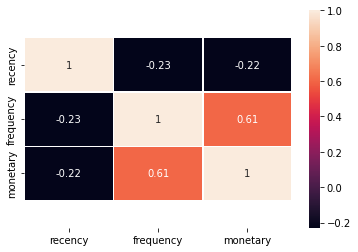

In [32]:
#변수간 선형관계 없음
g = sns.heatmap(rfm_normalized.corr(), annot=True, linewidths=.5)
bottom, top = g.get_ylim() # heatmap plot이 잘리는 것 방지하기 위한 방법
g.set_ylim(bottom+0.5, top-0.5)
plt.show()

## KMeans clustering

In [33]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfm_normalized)
labels = kmeans.labels_

In [34]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    ssd.append(kmeans.inertia_)
ssd

[8034.951410250644,
 5061.634910832436,
 4088.793858037164,
 3366.2309772996728,
 2916.301571356815,
 2592.6010064725683,
 2299.837100509155,
 2086.3682601319333,
 1918.7817368466035]

### Hopkins Statistic

In [35]:
#https://www.kaggle.com/code/jnikhilsai/rfm-clustering-of-customers-using-k-means
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
# Hopkins score
Hopkins_score=round(hopkins(rfm_normalized),2)
Hopkins_score

0.92

### Building Model(Hierarchial Cluster)

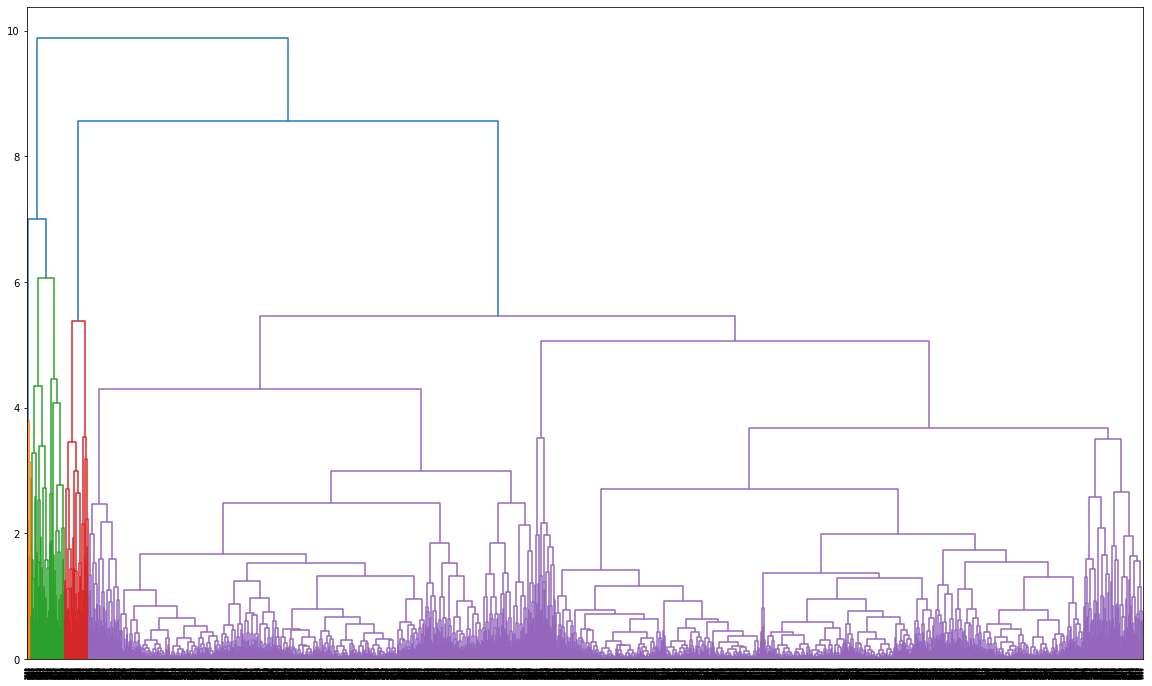

In [37]:
#complete linkage
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
plt.figure(figsize=(20,12))
mergings = linkage(rfm_normalized,method='complete')#,metrics='euclidean'
dendrogram(mergings)
plt.show()

In [38]:
# Clustering (by linkage function) - cut_tree 함수는 linkage로부터 클러스터 정보를 반환해주는 함수
# from scipy import cluster
# from numpy.random import default_rng
from scipy.cluster.hierarchy import cut_tree
cluster_labels= cut_tree(mergings, n_clusters=5).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
#assign cluster labels
pd.set_option('display.max_rows',None)
rfm_normalized['cluster_labels']=cluster_labels
rfm_normalized['cluster_labels'].value_counts()

0    4114
2      92
1      71
3      61
4      17
Name: cluster_labels, dtype: int64

In [40]:
rfm_normalized['cluster_labels'].value_counts()

0    4114
2      92
1      71
3      61
4      17
Name: cluster_labels, dtype: int64

### plots

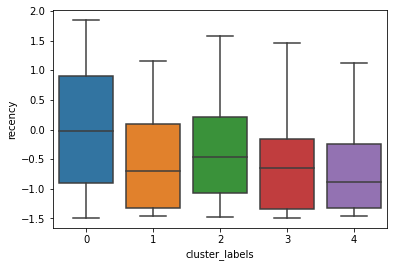

In [41]:
#recency
sns.boxplot(x='cluster_labels',y='recency',data=rfm_normalized)

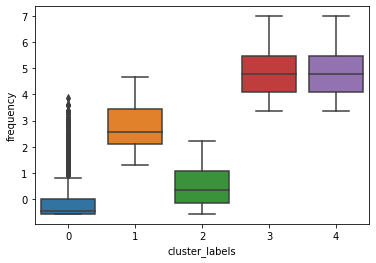

In [42]:
#frequency
sns.boxplot(x='cluster_labels',y='frequency',data=rfm_normalized)

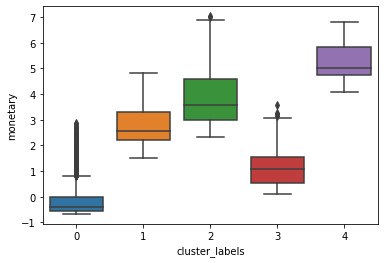

In [43]:
#monetary
sns.boxplot(x='cluster_labels',y='monetary',data=rfm_normalized)

### elbow curve

In [44]:
kmeans = KMeans(n_clusters = 5).fit(rfm_normalized)
kmeans.inertia_

3586.790370079164

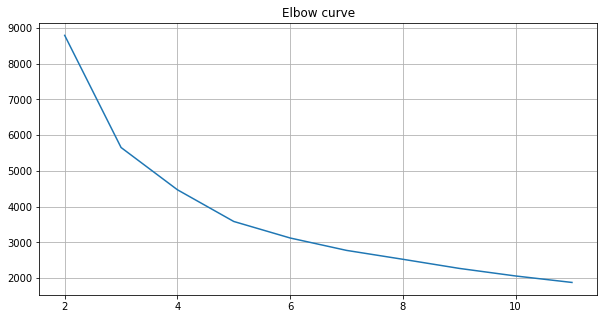

In [45]:
# 평면에 시각화를 위해 PCA를 이용해 2차원으로 차원 축소를 진행
distortions = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rfm_normalized)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 12), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()
#k=5 일때 급격한 distortions의 변화가 일어난 것으로 보아 cluster 수를 5로 설정

In [46]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(rfm_normalized)
    distortions.append(kmeanModel.inertia_)

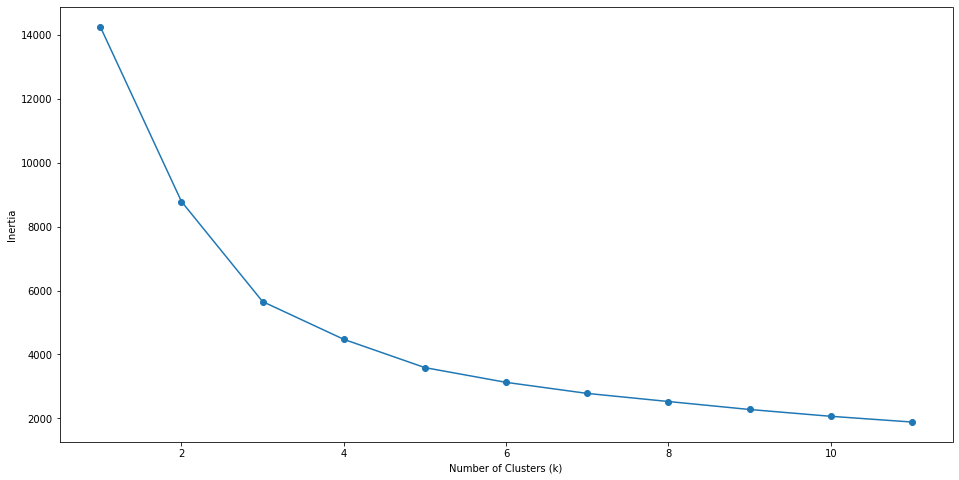

In [47]:
num_clusters = list(range(1, 12))	# K는 1 ~ 8사이의 정수
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(rfm_normalized)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화
plt.figure(figsize=(16,8))
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### silhouette_score

In [48]:
#https://dacon.io/competitions/official/235946/codeshare/5809
#Silhouette Coefficient는 실루엣 계수로 -1 부터 1사이의 값을 가지며 1에 가까울 수록 최적화된 군집
from sklearn.datasets import make_blobs
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=8,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8]

In [49]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 8).fit(rfm_normalized)
labels = kmeans.labels_
silhouette_score(rfm_normalized, labels, metric = 'euclidean')

0.3882090203947973

In [50]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    ssd.append(kmeans.labels_)
ssd

[array([0, 1, 0, ..., 0, 0, 0], dtype=int32),
 array([2, 0, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 1, 3, ..., 2, 2, 2], dtype=int32),
 array([3, 4, 0, ..., 1, 1, 1], dtype=int32),
 array([2, 4, 1, ..., 5, 5, 2], dtype=int32),
 array([1, 0, 2, ..., 6, 6, 6], dtype=int32),
 array([7, 2, 0, ..., 3, 3, 3], dtype=int32)]

In [51]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.6025472234633273
For n_clusters=3, the silhouette score is 0.44099269242723965
For n_clusters=4, the silhouette score is 0.4496614538994425
For n_clusters=5, the silhouette score is 0.4596557422399084
For n_clusters=6, the silhouette score is 0.37360919899473016
For n_clusters=7, the silhouette score is 0.38184571260927086
For n_clusters=8, the silhouette score is 0.38561684678964997


In [ ]:
rfm_normalized

recency  frequency  monetary  cluster_labels  silhouette_coeff
0     0.394250  -0.330814  0.538216               0          0.648856
1    -1.273252   2.105928  2.451072               1          0.461020
2    -1.300738   0.597469  0.834613               0          0.370495
3     1.713592  -0.330814  0.561756               0          0.546673
4     0.385088  -0.562885 -0.545559               0          0.749709
5     0.843193  -0.562885 -0.636753               0          0.728534
6    -1.007551   0.017292 -0.340820               0          0.664271
7     0.852355  -0.330814 -0.539090               0          0.726358
8    -0.384528  -0.098743 -0.261024               0          0.722418
9     1.173028   0.017292  0.080139               0          0.641212
10    1.154704  -0.446849  4.347953               2          0.451551
11   -0.668553   0.249363 -0.464701               0          0.673094
12   -1.319062   1.641787  0.084815               0          0.260343
13   -0.412015  -0.446849 -0.375111               0          0.738752
14   -1.154144  -0.214779  0.119092               0          0.629157
15    0.330115  -0.562885 -0.537262               0          0.750836
16   -0.879281  -0.214779 -0.555114               0          0.697494
17    0.467547   2.105928 -0.018613               0          0.239317
18   -1.410683  -0.562885 -0.567637               0          0.642063
19   -0.045531   0.481433  0.077742               0          0.632342
20   -0.705202  -0.562885 -0.663365               0          0.717550
21    0.550006  -0.562885 -0.614183               0          0.743677
22    1.118056  -0.562885 -0.605816               0          0.709015
23   -0.155476  -0.562885 -0.632850               0          0.746691
24    0.064414   1.525752 -0.107605               0          0.410860
25   -0.320394  -0.562885 -0.594566               0          0.742253
26   -1.493142  -0.562885 -0.343204               0          0.625321
27    0.834031  -0.446849 -0.411265               0          0.729366
28   -0.237935  -0.562885 -0.601878               0          0.745133
29   -1.135820   0.017292  0.216740               0          0.601586
30   -1.282414   0.945575  0.266759               0          0.414024
31   -0.109665   0.133327  2.610481               2          0.394201
32   -0.274583   1.177646  2.851550               2          0.172150
33   -0.751012  -0.562885 -0.576637               0          0.715987
34    1.777726  -0.562885 -0.640620               0          0.638074
35    1.466215  -0.562885 -0.387500               0          0.671512
36    1.319622  -0.562885 -0.613901               0          0.690201
37    0.834031  -0.214779 -0.027394               0          0.698473
38   -0.925092  -0.562885 -0.581207               0          0.700192
39    0.788220  -0.330814 -0.027479               0          0.706757
40    1.154704  -0.562885 -0.543422               0          0.706263
41   -0.466987  -0.562885 -0.524677               0          0.736170
42   -0.118827  -0.446849 -0.477076               0          0.750820
43    0.852355  -0.446849 -0.612706               0          0.728406
44   -0.824309  -0.098743 -0.491701               0          0.695606
45    1.631133  -0.562885 -0.595621               0          0.656037
46    0.110225   0.133327  1.923865               0          0.231575
47   -0.228773  -0.562885 -0.648635               0          0.744072
48    0.018604  -0.562885 -0.566934               0          0.751472
49    0.934814  -0.562885 -0.592780               0          0.723345
50    0.696599  -0.330814 -0.301228               0          0.731465
51   -0.063855  -0.214779 -0.120107               0          0.731966
52   -0.466987  -0.330814 -0.522427               0          0.734791
53   -0.302069  -0.446849 -0.562462               0          0.744425
54    1.282973  -0.446849 -0.439249               0          0.691842
55    1.044759  -0.562885 -0.573824               0          0.715327
56   -0.476149  -

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(rfm_normalized, rfm_normalized['cluster_labels'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# rfm_normalized 에 실루엣 계수 컬럼 추가
rfm_normalized['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(rfm_normalized, rfm_normalized['cluster_labels'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

rfm_normalized.head(8)
#

silhouette_samples( ) return 값의 shape (4355,)
Silhouette Analysis Score:0.610


recency  frequency  monetary  cluster_labels  silhouette_coeff
0  0.394250  -0.330814  0.538216               0          0.647803
1 -1.273252   2.105928  2.451072               1          0.460552
2 -1.300738   0.597469  0.834613               0          0.363513
3  1.713592  -0.330814  0.561756               0          0.545280
4  0.385088  -0.562885 -0.545559               0          0.748594
5  0.843193  -0.562885 -0.636753               0          0.727720
6 -1.007551   0.017292 -0.340820               0          0.663176
7  0.852355  -0.330814 -0.539090               0          0.725472

In [ ]:
rfm_normalized.groupby('cluster_labels')['silhouette_coeff'].mean()

cluster_labels
0    0.621623
1    0.384649
2    0.354790
3    0.465969
4    0.523316
Name: silhouette_coeff, dtype: float64

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

# 해당 함수는 테스트할 visualize_silhouette(테스팅할 군집 개수 리스트, 학습시킬 데이터) 로 사용 가능
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        
        # 그래프의 제목 및 범례 설정
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

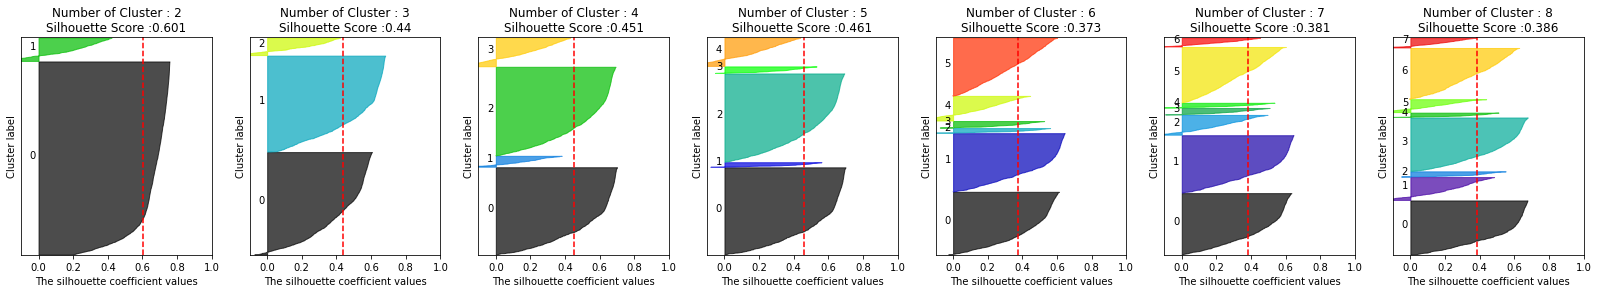

In [ ]:
# 위에서 만든 함수를 iris 데이터에 군집 개수 2,3,4,5 로 시각화
visualize_silhouette([ 2, 3, 4,5,6,7,8 ], rfm_normalized)
#전체 실루엣 계수는 군집의 개수가 2 일때 0.601로 가장 높음

## RFM점수 부여

In [ ]:
rfm_normalized

recency  frequency  monetary  cluster_labels  silhouette_coeff
0     0.394250  -0.330814  0.538216               0          0.648856
1    -1.273252   2.105928  2.451072               1          0.461020
2    -1.300738   0.597469  0.834613               0          0.370495
3     1.713592  -0.330814  0.561756               0          0.546673
4     0.385088  -0.562885 -0.545559               0          0.749709
5     0.843193  -0.562885 -0.636753               0          0.728534
6    -1.007551   0.017292 -0.340820               0          0.664271
7     0.852355  -0.330814 -0.539090               0          0.726358
8    -0.384528  -0.098743 -0.261024               0          0.722418
9     1.173028   0.017292  0.080139               0          0.641212
10    1.154704  -0.446849  4.347953               2          0.451551
11   -0.668553   0.249363 -0.464701               0          0.673094
12   -1.319062   1.641787  0.084815               0          0.260343
13   -0.412015  -0.446849 -0.375111               0          0.738752
14   -1.154144  -0.214779  0.119092               0          0.629157
15    0.330115  -0.562885 -0.537262               0          0.750836
16   -0.879281  -0.214779 -0.555114               0          0.697494
17    0.467547   2.105928 -0.018613               0          0.239317
18   -1.410683  -0.562885 -0.567637               0          0.642063
19   -0.045531   0.481433  0.077742               0          0.632342
20   -0.705202  -0.562885 -0.663365               0          0.717550
21    0.550006  -0.562885 -0.614183               0          0.743677
22    1.118056  -0.562885 -0.605816               0          0.709015
23   -0.155476  -0.562885 -0.632850               0          0.746691
24    0.064414   1.525752 -0.107605               0          0.410860
25   -0.320394  -0.562885 -0.594566               0          0.742253
26   -1.493142  -0.562885 -0.343204               0          0.625321
27    0.834031  -0.446849 -0.411265               0          0.729366
28   -0.237935  -0.562885 -0.601878               0          0.745133
29   -1.135820   0.017292  0.216740               0          0.601586
30   -1.282414   0.945575  0.266759               0          0.414024
31   -0.109665   0.133327  2.610481               2          0.394201
32   -0.274583   1.177646  2.851550               2          0.172150
33   -0.751012  -0.562885 -0.576637               0          0.715987
34    1.777726  -0.562885 -0.640620               0          0.638074
35    1.466215  -0.562885 -0.387500               0          0.671512
36    1.319622  -0.562885 -0.613901               0          0.690201
37    0.834031  -0.214779 -0.027394               0          0.698473
38   -0.925092  -0.562885 -0.581207               0          0.700192
39    0.788220  -0.330814 -0.027479               0          0.706757
40    1.154704  -0.562885 -0.543422               0          0.706263
41   -0.466987  -0.562885 -0.524677               0          0.736170
42   -0.118827  -0.446849 -0.477076               0          0.750820
43    0.852355  -0.446849 -0.612706               0          0.728406
44   -0.824309  -0.098743 -0.491701               0          0.695606
45    1.631133  -0.562885 -0.595621               0          0.656037
46    0.110225   0.133327  1.923865               0          0.231575
47   -0.228773  -0.562885 -0.648635               0          0.744072
48    0.018604  -0.562885 -0.566934               0          0.751472
49    0.934814  -0.562885 -0.592780               0          0.723345
50    0.696599  -0.330814 -0.301228               0          0.731465
51   -0.063855  -0.214779 -0.120107               0          0.731966
52   -0.466987  -0.330814 -0.522427               0          0.734791
53   -0.302069  -0.446849 -0.562462               0          0.744425
54    1.282973  -0.446849 -0.439249               0          0.691842
55    1.044759  -0.562885 -0.573824               0          0.715327
56   -0.476149  -

In [ ]:
### Quantile 값 123등급으로 계산
###Quantile 값 계산 -각 구간에 일정한 비율로 데이터 포함시키기 위한 목적
quintiles = rfm_normalized[['recency', 'frequency', 'monetary']].quantile([.2, .25, .3, .35, .4, .5, .6, .7, .8, .9]).to_dict()

### recency 지표에 대한 점수를 제공하는 지표 
def r_score(r): 
    if r < quintiles['recency'][.2]: 
        return 3 
    elif r < quintiles['recency'][.8]: 
        return 2 
    else: 
        return 1
### frequency 및 monetary 지표에 대한 점수를 제공하는 벤치마크.   
def fm_score(f): 
    if f > quintiles['frequency'][.8]: 
        return 3 
    elif f > quintiles['frequency'][.2]: 
        return 2 
    else: 
        return 1

In [ ]:
#이 규칙을 데이터 프레임에 적용
rfm2 = rfm_normalized.copy() 
rfm2['r_score'] = rfm2.recency.apply(lambda x: r_score(x)) 
rfm2['f_score'] = rfm2.frequency.apply(lambda x: fm_score(x)) 
rfm2 ['m_score'] = rfm2.monetary.apply(lambda x: fm_score(x)) 
rfm2['total'] = rfm2['r_score'].map(str)+rfm2['f_score'].map(str) + rfm2['m_score'].map(str)

### 그룹 세분화

In [ ]:
rfm2

recency  frequency  monetary  cluster_labels  silhouette_coeff  \
0     0.394250  -0.330814  0.538216               0          0.648856   
1    -1.273252   2.105928  2.451072               1          0.461020   
2    -1.300738   0.597469  0.834613               0          0.370495   
3     1.713592  -0.330814  0.561756               0          0.546673   
4     0.385088  -0.562885 -0.545559               0          0.749709   
5     0.843193  -0.562885 -0.636753               0          0.728534   
6    -1.007551   0.017292 -0.340820               0          0.664271   
7     0.852355  -0.330814 -0.539090               0          0.726358   
8    -0.384528  -0.098743 -0.261024               0          0.722418   
9     1.173028   0.017292  0.080139               0          0.641212   
10    1.154704  -0.446849  4.347953               2          0.451551   
11   -0.668553   0.249363 -0.464701               0          0.673094   
12   -1.319062   1.641787  0.084815               0          0.260343   
13   -0.412015  -0.446849 -0.375111               0          0.738752   
14   -1.154144  -0.214779  0.119092               0          0.629157   
15    0.330115  -0.562885 -0.537262               0          0.750836   
16   -0.879281  -0.214779 -0.555114               0          0.697494   
17    0.467547   2.105928 -0.018613               0          0.239317   
18   -1.410683  -0.562885 -0.567637               0          0.642063   
19   -0.045531   0.481433  0.077742               0          0.632342   
20   -0.705202  -0.562885 -0.663365               0          0.717550   
21    0.550006  -0.562885 -0.614183               0          0.743677   
22    1.118056  -0.562885 -0.605816               0          0.709015   
23   -0.155476  -0.562885 -0.632850               0          0.746691   
24    0.064414   1.525752 -0.107605               0          0.410860   
25   -0.320394  -0.562885 -0.594566               0          0.742253   
26   -1.493142  -0.562885 -0.343204               0          0.625321   
27    0.834031  -0.446849 -0.411265               0          0.729366   
28   -0.237935  -0.562885 -0.601878               0          0.745133   
29   -1.135820   0.017292  0.216740               0          0.601586   
30   -1.282414   0.945575  0.266759               0          0.414024   
31   -0.109665   0.133327  2.610481               2          0.394201   
32   -0.274583   1.177646  2.851550               2          0.172150   
33   -0.751012  -0.562885 -0.576637               0          0.715987   
34    1.777726  -0.562885 -0.640620               0          0.638074   
35    1.466215  -0.562885 -0.387500               0          0.671512   
36    1.319622  -0.562885 -0.613901               0          0.690201   
37    0.834031  -0.214779 -0.027394               0          0.698473   
38   -0.925092  -0.562885 -0.581207               0          0.700192   
39    0.788220  -0.330814 -0.027479               0          0.706757   
40    1.154704  -0.562885 -0.543422               0          0.706263   
41   -0.466987  -0.562885 -0.524677               0          0.736170   
42   -0.118827  -0.446849 -0.477076               0          0.750820   
43    0.852355  -0.446849 -0.612706               0          0.728406   
44   -0.824309  -0.098743 -0.491701               0          0.695606   
45    1.631133  -0.562885 -0.595621               0          0.656037   
46    0.110225   0.133327  1.923865               0          0.231575   
47   -0.228773  -0.562885 -0.648635               0          0.744072   
48    0.018604  -0.562885 -0.566934               0          0.751472   
49    0.934814  -0.562885 -0.592780               0          0.723345   
50    0.696599  -0.330814 -0.301228               0          0.731465   
51   -0.063855  -0.214779 -0.120107               0          0.731966   
52   -0.466987  -0.330814 -0.522427               0          0.734791   
53   -0.302069  -0.446849 -0.562462               0          0.74

In [ ]:
### 7개의 그룹으로 나누고 이에 맞는 전략 세우기
###RFM 점수가 가장 높은 모든 고객의 챔피언인 충성 고객. 
rfm2_group1 = rfm2[rfm2['total']=='333']
rfm2_group1['label'] = 'champion'
###챔피언이 될 가능성이 가장 높은 고객. 그들은 최근에 제품을 구매하고 꽤 자주 구매합니다. 게다가 그들이 쓴 금액은 꽤 큼
rfm2_group2 = rfm2[rfm2['total'].str.contains('332|331|323|313')] 
rfm2_group2['label'] = 'potential1'
###빈도 점수 및 금전적 점수가 잠재 1 그룹보다 약간 낮은 고객 
rfm2_group3 = rfm2[rfm2['total'].str.contains('321|322|311|312')] 
rfm2_group3['label'] = 'potential2'
###돈을 많이 내고 매장에 자주 오던 고객님들. 그들은 최근에 구매하지 않음
rfm2_group4 = rfm2[rfm2['total'].str.contains('233')]
rfm2_group4['label'] = 'needing_attention1'
###매장에 자주 오지 않고 자주 구매하지 않는 고객. 
rfm2_group5 = rfm2[rfm2['total'].str.contains('223|213|212|231|232|211|221|222')]
rfm2_group5['label'] = 'needing_attention2'
###장기간 매장을 방문하지 않으신 고객님. 그러나 때때로 그들은 많은 돈을 씀
rfm2_group6 = rfm2[rfm2['total'].str.contains('132|123|113|133')]
rfm2_group6['label'] = 'lost1'
###이탈 고객 
rfm2_group7 = rfm2[rfm2['total'].str.contains('111|112|121|122|131')]
rfm2_group7['label'] = 'lost2'

<ipython-input-57-5b3e2640b327>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_group1['label'] = 'champion'
<ipython-input-57-5b3e2640b327>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_group2['label'] = 'potential1'
<ipython-input-57-5b3e2640b327>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
rfm2['total'].value_counts()

222    970
211    472
212    371
233    323
322    278
111    263
122    224
112    221
333    220
223    210
232    164
221    103
311     99
323     86
312     79
332     67
121     49
123     48
132     42
321     27
133     22
113      9
213      6
313      2
Name: total, dtype: int64

In [ ]:
rfm2.head()

recency  frequency  monetary  cluster_labels  silhouette_coeff  r_score  \
0  0.394250  -0.330814  0.538216               0          0.648856        2   
1 -1.273252   2.105928  2.451072               1          0.461020        3   
2 -1.300738   0.597469  0.834613               0          0.370495        3   
3  1.713592  -0.330814  0.561756               0          0.546673        1   
4  0.385088  -0.562885 -0.545559               0          0.749709        2   

   f_score  m_score total  
0        2        3   223  
1        3        3   333  
2        3        3   333  
3        2        3   123  
4        1        2   212

In [ ]:
rfm2_group7

recency  frequency  monetary  cluster_labels  silhouette_coeff  \
9     1.173028   0.017292  0.080139               0          0.641212   
22    1.118056  -0.562885 -0.605816               0          0.709015   
34    1.777726  -0.562885 -0.640620               0          0.638074   
35    1.466215  -0.562885 -0.387500               0          0.671512   
36    1.319622  -0.562885 -0.613901               0          0.690201   
40    1.154704  -0.562885 -0.543422               0          0.706263   
45    1.631133  -0.562885 -0.595621               0          0.656037   
54    1.282973  -0.446849 -0.439249               0          0.691842   
55    1.044759  -0.562885 -0.573824               0          0.715327   
58    1.841861  -0.562885 -0.549215               0          0.629404   
63    1.557836  -0.562885 -0.560465               0          0.664552   
65    1.612809  -0.562885 -0.607644               0          0.658180   
73    1.521188  -0.446849  0.083444               0          0.631302   
84    1.173028  -0.562885 -0.588589               0          0.704463   
95    1.512026  -0.446849 -0.540553               0          0.668228   
104   1.136380  -0.446849 -0.327735               0          0.702391   
121   1.264649  -0.330814 -0.612411               0          0.691041   
126   1.621971  -0.446849 -0.334766               0          0.649487   
139   1.154704  -0.562885 -0.613480               0          0.705766   
145   1.631133  -0.562885 -0.504216               0          0.655256   
146   1.411243  -0.562885 -0.555192               0          0.680904   
147   1.163866  -0.098743  0.064882               0          0.653699   
154   1.814375  -0.562885 -0.579449               0          0.633304   
159   1.173028  -0.562885 -0.536559               0          0.704607   
168   1.557836  -0.562885 -0.549503               0          0.664486   
169   1.741078  -0.330814 -0.558356               0          0.636403   
180   1.319622  -0.098743 -0.561787               0          0.671825   
189   1.429567  -0.562885 -0.538106               0          0.678836   
191   1.750240  -0.562885 -0.450611               0          0.639255   
200   1.173028  -0.562885 -0.524255               0          0.704547   
204   1.191352  -0.562885 -0.366969               0          0.699342   
211   1.658619  -0.562885 -0.525309               0          0.652254   
219   1.612809  -0.562885 -0.554137               0          0.658067   
224   1.218839  -0.330814 -0.380919               0          0.693157   
225   1.466215  -0.446849  0.159739               0          0.629580   
233   1.053921  -0.562885 -0.527559               0          0.714713   
235   1.356270  -0.446849 -0.464279               0          0.684654   
239   1.640295  -0.446849 -0.156457               0          0.637126   
252   1.154704  -0.562885 -0.565668               0          0.706238   
259   1.832699  -0.562885 -0.554137               0          0.630667   
261   1.145542  -0.562885 -0.626487               0          0.706332   
274   1.786889  -0.562885 -0.547668               0          0.636534   
278   1.521188  -0.446849 -0.526491               0          0.667039   
288   1.484539  -0.562885 -0.006554               0          0.645580   
310   1.777726  -0.446849 -0.628807               0          0.636112   
314   1.328784  -0.562885 -0.580574               0          0.689534   
318   1.686106  -0.562885 -0.568762               0          0.649344   
321   1.411243  -0.562885 -0.554137               0          0.680900   
323   1.163866  -0.562885 -0.561379               0          0.705440   
328   1.466215  -0.562885 -0.649901               0          0.674387   
335   1.228001  -0.562885 -0.587675               0          0.699399   
342   1.218839  -0.562885 -0.564346               0          0.700387   
343   1.484539  -0.562885 -0.626417               0          0.672667   
345   1.182190  -0.562885 -0.594566               0          0.70

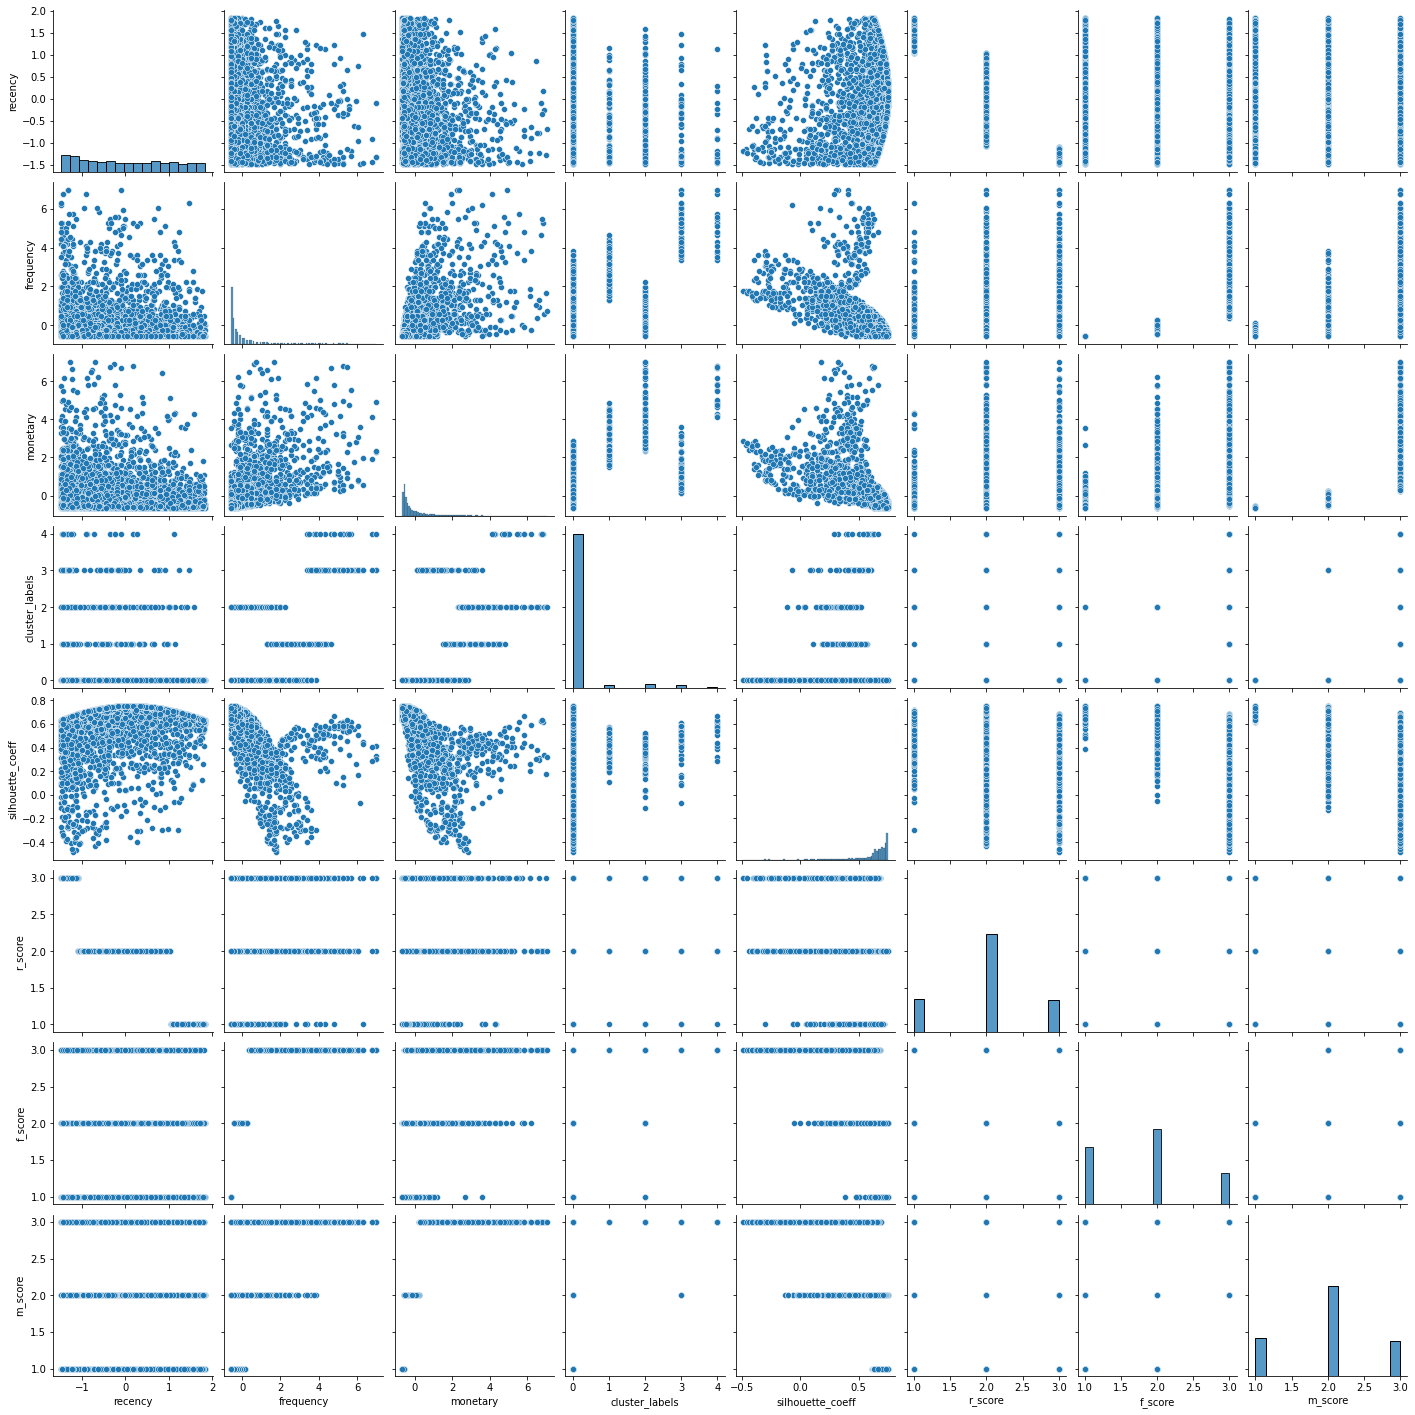

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(rfm2)
plt.show()

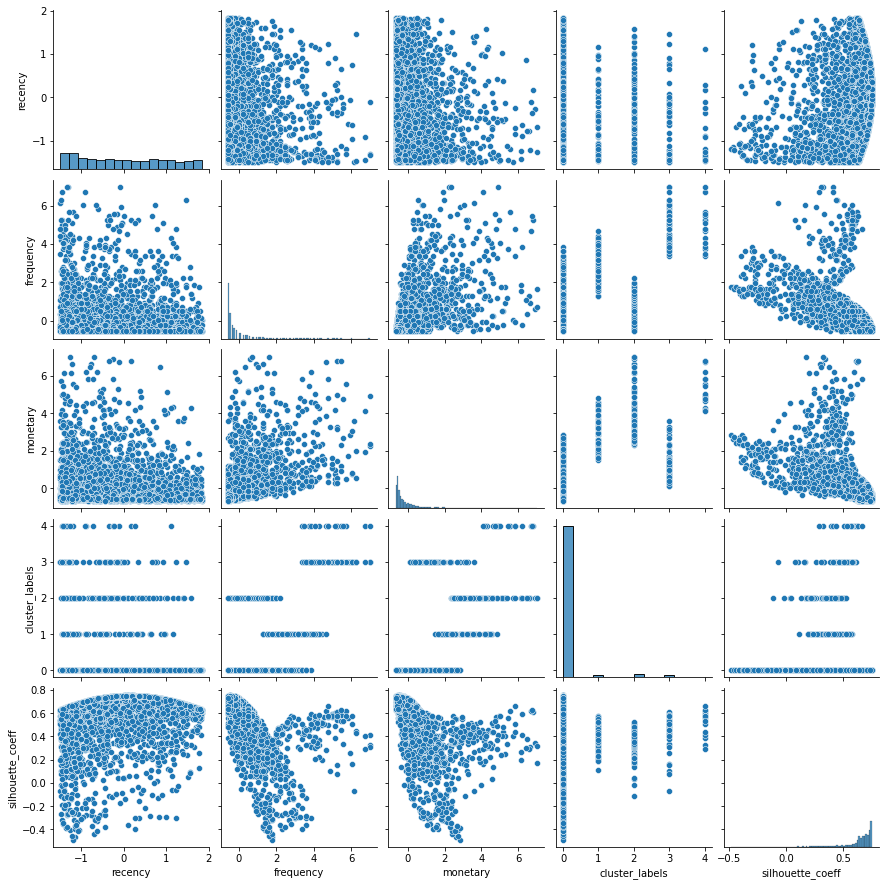

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(rfm_normalized)
plt.show()